<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/LLE_on_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px

In [42]:
iris_data = pd.read_csv('iris.data')
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
rel_feat = cols[:-1]
iris_data.columns = cols
iris_data.head()


,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Applying LLE on this dataset

### #1 Standardize data
LLE is based on making data into lower dimension trying to preserve distance between the neighbours. Briefly, it preserves the geometry of the original dataset. When working with distances, important to have the same range on variables. To avoid this problem, use MinMaxScaler to fit the range in 0 to 1,

In [13]:
min_max_iris = iris_data.copy()
min_max_iris[rel_feat] = MinMaxScaler().fit_transform(min_max_iris[rel_feat])
min_max_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,149.0,0.430089,0.230165,0.0,0.222222,0.416667,0.583333,1.0
sepal width,149.0,0.437919,0.180625,0.0,0.333333,0.416667,0.541667,1.0
petal length,149.0,0.470254,0.298246,0.0,0.101695,0.576271,0.694915,1.0
petal width,149.0,0.460570,0.317205,0.0,0.083333,0.500000,0.708333,1.0


### #2 Apply LLE

In [33]:

lle = LocallyLinearEmbedding(n_components = 3, n_neighbors = 30)
iris_lle = lle.fit_transform(min_max_iris[rel_feat])
# this will create n * 3 matrix with cols as LLE1, LLE2, LLE3 axes

min_max_iris[['LLE1', 'LLE2', 'LLE3']] = iris_lle

min_max_iris.head()

,sepal length,sepal width,petal length,petal width,class,LLE1,LLE2,LLE3
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,-0.117941,-0.021487,0.005832
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,-0.081961,0.084662,0.026263
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,-0.092765,0.072605,0.039291
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,-0.083970,0.098398,0.045005
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,-0.123179,-0.028170,0.011530


### Visualize the data

<Axes: xlabel='LLE1', ylabel='LLE2'>

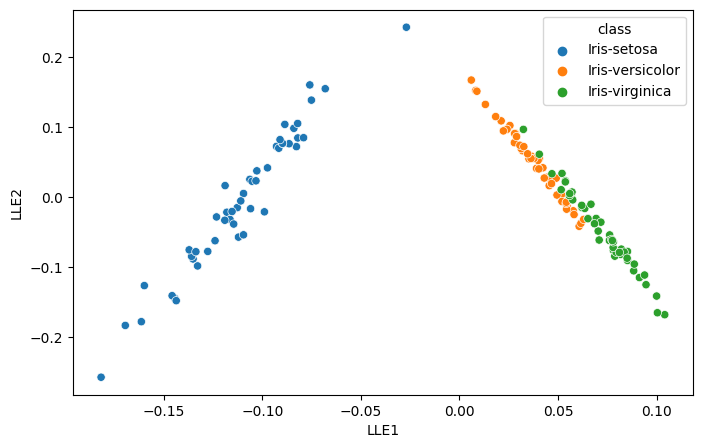

In [36]:
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(x='LLE1', y='LLE2', hue='class', data=min_max_iris)

ValueError: ignored

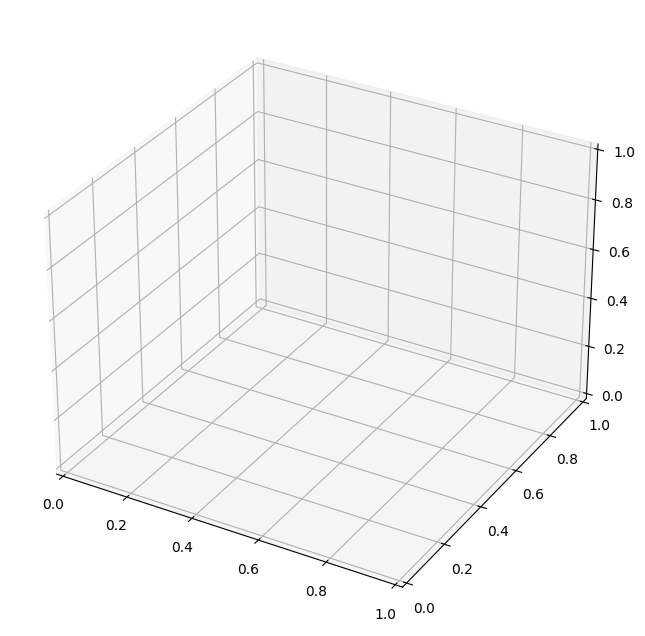

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
fig.show()
colors_iris = {'Iris-setosa':'b', 'Iris-versicolor':'r', 'Iris-virginica':'g'}

plt.scatter(
    min_max_iris.LLE1, min_max_iris.LLE2, zs=min_max_iris.LLE3,
    depthshade=False, c=iris_data['class'].map(colors_iris),
    s=100
)

In [47]:
fig = px.scatter_3d(min_max_iris, x='LLE1', y='LLE2', z='LLE3',
                    color='class')
fig.show()